In [32]:
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [33]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [34]:
dfRatioPsi2sJpsiVsPtAllRuns = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC22_pass7_skimmed/all_runs/pt_dependence/systematic_ratio.txt', sep=' ')
ptMinAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_min"]
ptMaxAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_max"]
ptAllRuns = (ptMinAllRuns + ptMaxAllRuns) / 2.
errPtAllRuns = (ptMaxAllRuns - ptMinAllRuns) / 2.

ratioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["val"]
statRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["stat"]
systRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["syst"]


dfRatioPsi2sJpsiVsPtPrel = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/preliminary_ratio.txt', sep=' ')
ptMinPrel = dfRatioPsi2sJpsiVsPtPrel["x_min"]
ptMaxPrel = dfRatioPsi2sJpsiVsPtPrel["x_max"]
ptPrel = (ptMinPrel + ptMaxPrel) / 2.
errPtPrel = (ptMaxPrel - ptMinPrel) / 2.

ratioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["val"]
statRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["stat"]
systRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["syst"]


dfRatioPsi2sJpsiVsPtGoodRuns = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC22_pass7_skimmed/good_runs/pt_dependence/systematic_ratio.txt', sep=' ')
ptMinGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["x_min"]
ptMaxGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["x_max"]
ptGoodRuns = (ptMinGoodRuns + ptMaxGoodRuns) / 2.
errPtGoodRuns = (ptMaxGoodRuns - ptMinGoodRuns) / 2.

ratioPsi2sJpsiVsPtGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["val"]
statRatioPsi2sJpsiVsPtGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["stat"]
systRatioPsi2sJpsiVsPtGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["syst"]


dfRatioPsi2sJpsiVsPt2024 = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/pt_dependence_noBkg/systematic_ratio.txt', sep=' ')
ptMin2024 = dfRatioPsi2sJpsiVsPt2024["x_min"]
ptMax2024 = dfRatioPsi2sJpsiVsPt2024["x_max"]
pt2024 = (ptMin2024 + ptMax2024) / 2.
errPt2024 = (ptMax2024 - ptMin2024) / 2.

ratioPsi2sJpsiVsPt2024 = dfRatioPsi2sJpsiVsPt2024["val"]
statRatioPsi2sJpsiVsPt2024 = dfRatioPsi2sJpsiVsPt2024["stat"]
systRatioPsi2sJpsiVsPt2024 = dfRatioPsi2sJpsiVsPt2024["syst"]


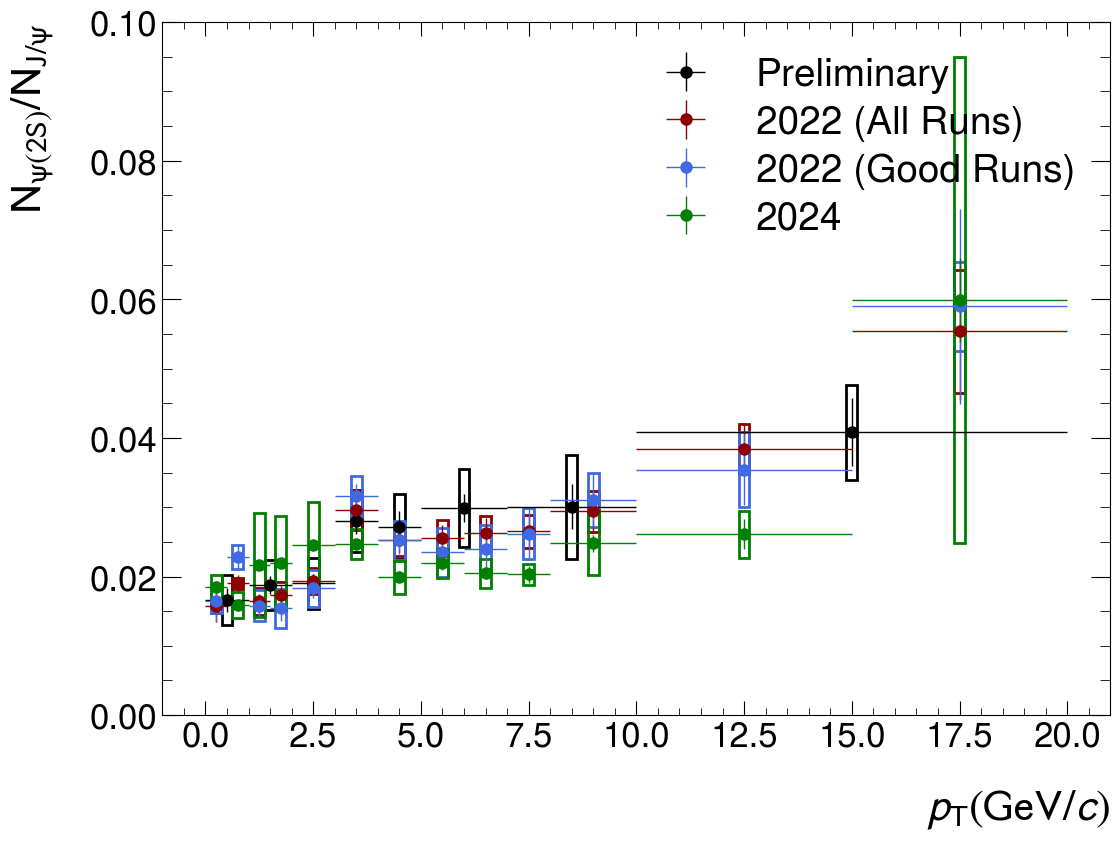

In [35]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(ptPrel, 0.125, ratioPsi2sJpsiVsPtPrel, systRatioPsi2sJpsiVsPtPrel, ax, 'black', 2)
plot_syst(ptAllRuns, 0.125, ratioPsi2sJpsiVsPtAllRuns, systRatioPsi2sJpsiVsPtAllRuns, ax, 'darkred', 2)
plot_syst(ptGoodRuns, 0.125, ratioPsi2sJpsiVsPtGoodRuns, systRatioPsi2sJpsiVsPtGoodRuns, ax, 'royalblue', 2)
plot_syst(pt2024, 0.125, ratioPsi2sJpsiVsPt2024, systRatioPsi2sJpsiVsPt2024, ax, 'green', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$N_{\psi(\rm{2S})} / N_{\rm{J}/\psi}$')
plt.ylim(0, 0.10)
#plt.yscale('log')
plt.errorbar(ptPrel, ratioPsi2sJpsiVsPtPrel, xerr=errPtPrel, yerr=statRatioPsi2sJpsiVsPtPrel, label="Preliminary", fmt='o', color='black', ecolor='black')
plt.errorbar(ptAllRuns, ratioPsi2sJpsiVsPtAllRuns, xerr=errPtAllRuns, yerr=statRatioPsi2sJpsiVsPtAllRuns, label="2022 (All Runs)", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(ptGoodRuns, ratioPsi2sJpsiVsPtGoodRuns, xerr=errPtGoodRuns, yerr=statRatioPsi2sJpsiVsPtGoodRuns, label="2022 (Good Runs)", fmt='o', color='royalblue', ecolor='royalblue')
plt.errorbar(pt2024, ratioPsi2sJpsiVsPt2024, xerr=errPt2024, yerr=statRatioPsi2sJpsiVsPt2024, label="2024", fmt='o', color='green', ecolor='green')
plt.legend(loc='upper right')
#plt.text(6, 3e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
#plt.text(6, 1.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
#plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_pt_vs_centrality.pdf", format="pdf", bbox_inches="tight")
plt.show()

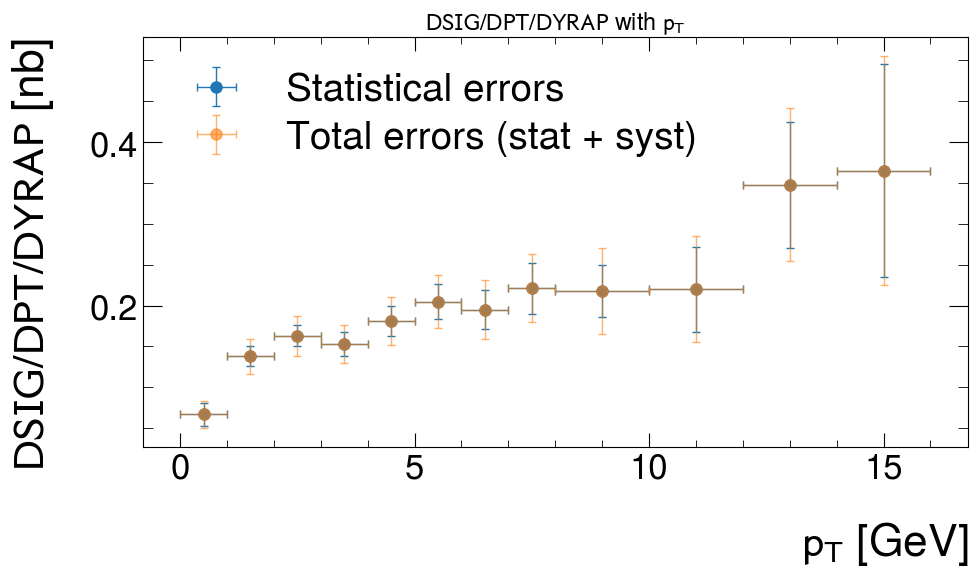

In [19]:
file_path = "/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/HEPData-77781-v1-yaml/Table5.yaml"

with open(file_path, "r") as f:
    hep_data = yaml.safe_load(f)

independent_var = hep_data["independent_variables"][0]["values"]
pT_centers = [(entry["low"] + entry["high"]) / 2 for entry in independent_var]
pT_widths = [(entry["high"] - entry["low"]) / 2 for entry in independent_var]

# Estrarre le variabili dipendenti ($\mathrm{DSIG}/\mathrm{DPT}/\mathrm{DYRAP}$)
dependent_var = hep_data["dependent_variables"][0]["values"]
y_values = [entry["value"] for entry in dependent_var]

# Calcolo degli errori
stat_errors = [entry["errors"][0]["symerror"] for entry in dependent_var]
syst_errors = [
    np.sqrt(
        sum(
            err["symerror"]**2
            for err in entry["errors"]
            if "sys" in err["label"]
        )
    )
    for entry in dependent_var
]

# Errore totale (statistico + sistematico)
total_errors = np.sqrt(np.array(stat_errors)**2 + np.array(syst_errors)**2)

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Grafico con barre di errore
plt.errorbar(
    pT_centers,
    y_values,
    xerr=pT_widths,
    yerr=stat_errors,
    fmt="o",
    label="Statistical errors",
    capsize=3,
)
plt.errorbar(
    pT_centers,
    y_values,
    xerr=pT_widths,
    yerr=total_errors,
    fmt="o",
    label="Total errors (stat + syst)",
    capsize=3,
    alpha=0.6,
)

# Personalizzazione
plt.title(r"$\mathrm{DSIG}/\mathrm{DPT}/\mathrm{DYRAP}$ with $p_{\rm T}$")
plt.xlabel(r"$p_{\rm T}$ [GeV]")
plt.ylabel(r"$\mathrm{DSIG}/\mathrm{DPT}/\mathrm{DYRAP}$ [nb]")
plt.legend()
plt.grid(False)
plt.tight_layout()

# Mostrare il grafico
plt.show()